In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_spss('nilt23w1.sav')

In [4]:
df['RELIGCAT'].value_counts()

RELIGCAT
Protestant     457
Catholic       398
No religion    300
Name: count, dtype: int64

In [5]:
df['PROTCATH'].value_counts()

PROTCATH
Part of the Protestant community    470
Part of the Catholic community      375
Neither                             342
Name: count, dtype: int64

In [6]:
df['URBRUR'].value_counts()

URBRUR
Urban    784
Rural    416
Name: count, dtype: int64

/var/folders/ll/gtcbtj4n6mjf4mwvq3711yw40000gn/T/ipykernel_5413/2521822401.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  paramilitary_perception = df.groupby(['RELAREA', 'PGCONTRL']).size().unstack()


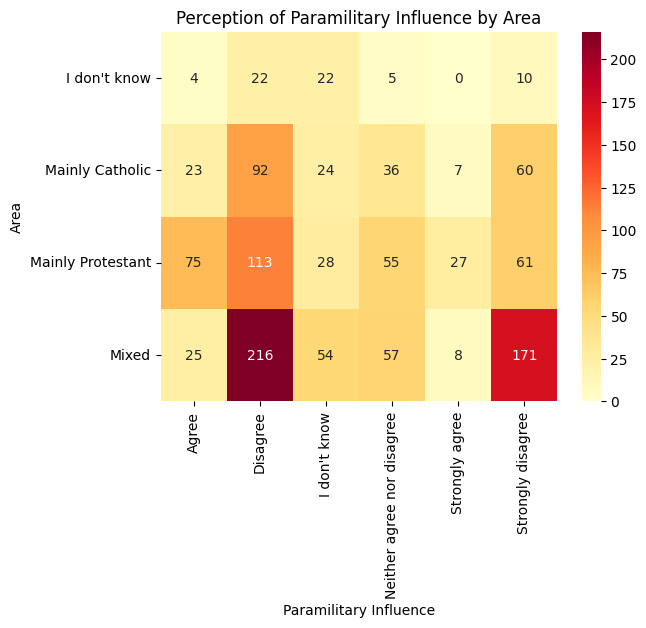

In [7]:
paramilitary_perception = df.groupby(['RELAREA', 'PGCONTRL']).size().unstack()
sns.heatmap(paramilitary_perception, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Perception of Paramilitary Influence by Area')
plt.xlabel('Paramilitary Influence')
plt.ylabel('Area')
plt.show()

/var/folders/ll/gtcbtj4n6mjf4mwvq3711yw40000gn/T/ipykernel_5413/2343064000.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_reporting = df.groupby(['RELIGCAT', 'REPBURG']).size().unstack()


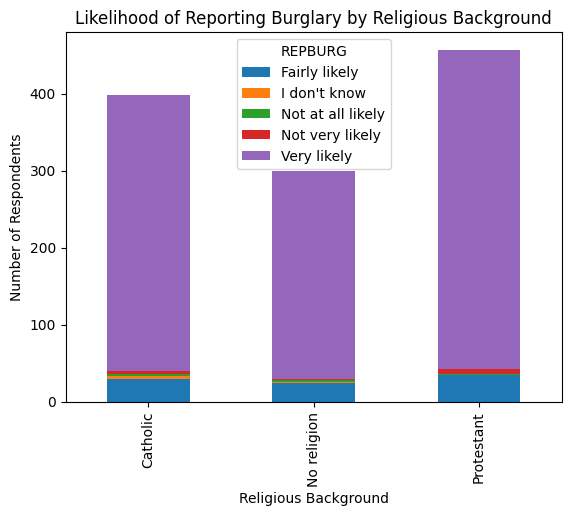

In [9]:
crime_reporting = df.groupby(['RELIGCAT', 'REPBURG']).size().unstack()
crime_reporting.plot(kind='bar', stacked=True)
plt.title('Likelihood of Reporting Burglary by Religious Background')
plt.xlabel('Religious Background')
plt.ylabel('Number of Respondents')
plt.show()

/var/folders/ll/gtcbtj4n6mjf4mwvq3711yw40000gn/T/ipykernel_5413/573184782.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pps_confidence = df.groupby(['RELIGCAT', 'PPSEFF']).size().unstack()


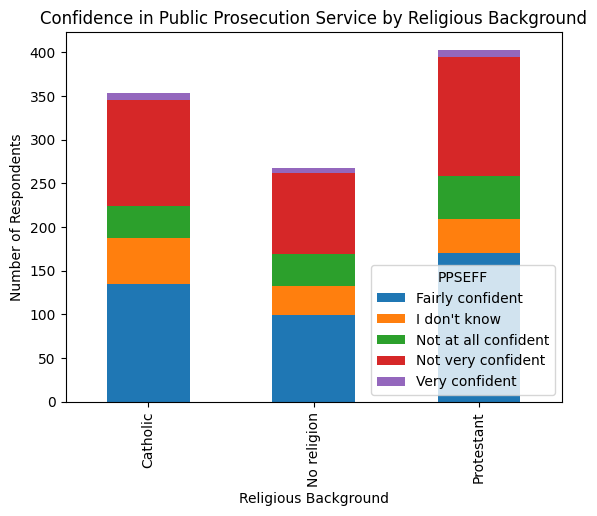

In [10]:
pps_confidence = df.groupby(['RELIGCAT', 'PPSEFF']).size().unstack()
pps_confidence.plot(kind='bar', stacked=True)
plt.title('Confidence in Public Prosecution Service by Religious Background')
plt.xlabel('Religious Background')
plt.ylabel('Number of Respondents')
plt.show()

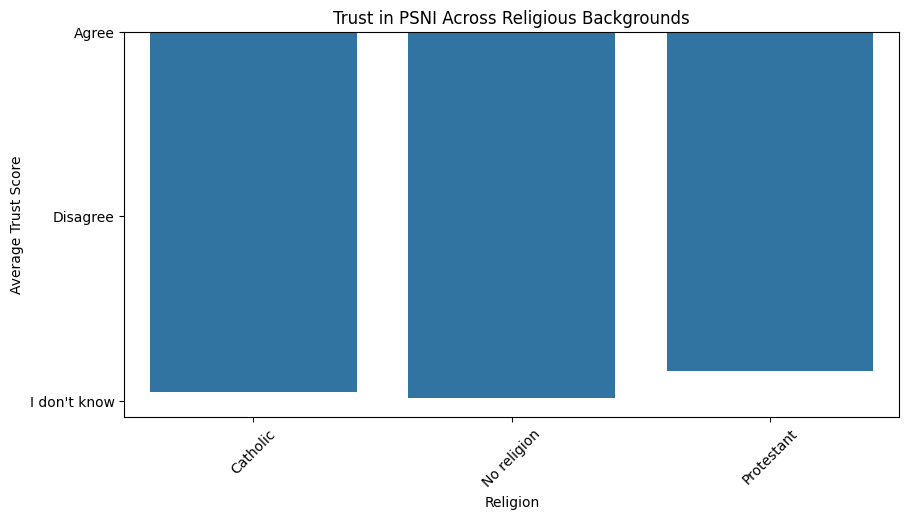

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x="RELIGCAT", y="PSNISAFE", data=df, estimator=lambda x: sum(x) / len(x), errorbar=None)
plt.xticks(rotation=45)
plt.title("Trust in PSNI Across Religious Backgrounds")
plt.ylabel("Average Trust Score")
plt.xlabel("Religion")
plt.show()

In [25]:
df['SAFEAREA'].dtype

CategoricalDtype(categories=['Fairly safe', 'Fairly unsafe', 'I don't know',
                  'Neither safe nor unsafe', 'Very safe', 'Very unsafe'],
, ordered=False, categories_dtype=object)

In [26]:
safety_mapping = {
    "Very Unsafe": 1,
    "Fairly Unsafe": 2,
    "Neither safe nor unsafe": 3,
    "Fairly Safe": 4,
    "Very Safe": 5
}
df["SAFEAREA_numeric"] = df["SAFEAREA"].map(safety_mapping)

In [22]:
income_mapping = {
    "Less than £100 per week": 50,
    "£100-£180 per week": 140,
    "£181-£240 per week": 210,
    "£241-£300 per week": 270,
    "£301-£360 per week": 330,
    "£361-£420 per week": 390,
    "£421-£510 per week": 465,
    "£511-£630 per week": 570,
    "£631-£831 per week": 730,
    "£831 or more per week": 900,
    "I don't know": None  # Treat as NaN
}

df["PERSINC3_numeric"] = df["PERSINC3"].map(income_mapping)

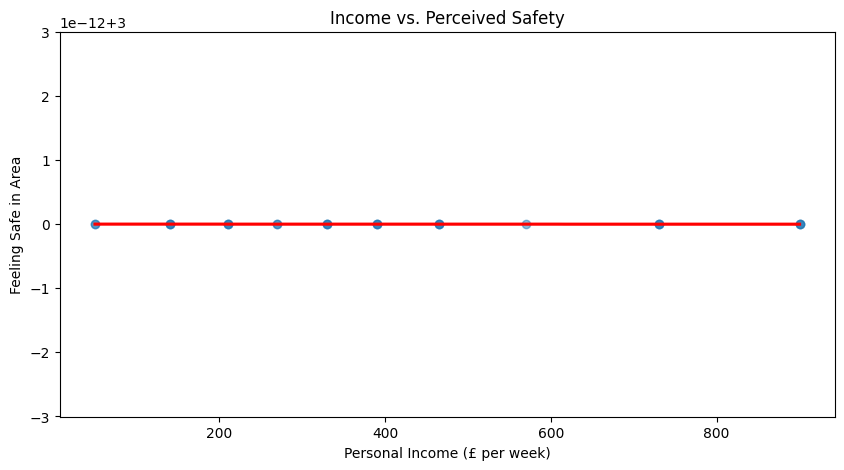

In [28]:
df = df.dropna(subset=["PERSINC3_numeric", "SAFEAREA"])

plt.figure(figsize=(10, 5))
sns.regplot(x="PERSINC3_numeric", y="SAFEAREA_numeric", data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Income vs. Perceived Safety")
plt.xlabel("Personal Income (£ per week)")
plt.ylabel("Feeling Safe in Area")
plt.show()